In [1]:
# 必要なライブラリの読み込み
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import csv
%matplotlib inline

In [2]:
# データが格納されている作業ディレクトリまでパス指定
os.chdir("/Users/naokihamaguchi/Desktop/")

# test.csvの読み取り
test = pd.read_csv("titanictest.csv")

# train.csvの読み取り
train = pd.read_csv("titanictrain.csv")

In [3]:
# アウトプットはtestデータをtrainデータに入れた時にSurvived or notが計測できることにあり、それがどのくらいの正答率なのかをだす

In [17]:
# titanic1で欠損値処理をしたので繰り返す

In [18]:
df = train.loc[:, ['Survived','Pclass','Sex','SibSp','Parch','Fare']]

In [19]:
# Sexをダミー変数化
sex_mapping = pd.get_dummies(df['Sex'])

In [20]:
# マッピングの実行
df['Sex'] = sex_mapping

In [21]:
df.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare
0,0,3,0,1,0,7.2500
1,1,1,1,1,0,71.2833
2,1,3,1,0,0,7.9250
3,1,1,1,1,0,53.1000
4,0,3,0,0,0,8.0500


In [22]:
# versicolorとversinicaの二値分類をする
df = np.array(df)
X_1 = df[:, 1:6]
y_1 = df[:,0]

# データセットの分割
from sklearn.model_selection import train_test_split
X_1_train, X_1_test, y_1_train, y_1_test = train_test_split(X_1, y_1, test_size=0.3, random_state=0)

# 線形SVCの学習
from sklearn.svm import SVC
svc_1 = SVC(kernel='linear', C=1.0)
svc_1.fit(X_1_train, y_1_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [23]:
# 混合行列のarrayを作成
# (正解ラベル, 予測ラベル)
from sklearn.metrics import confusion_matrix
cm_1 = confusion_matrix(y_1_test, svc_1.predict(X_1_test))
cm_1

array([[140,  28],
       [ 29,  71]])

In [24]:
# 混合行列をグラフでプロットする関数
def plot_cm(confmat):
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(confmat.shape[0]):
        for j in range(confmat.shape[1]):
            ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
    plt.title('predicted label')
    plt.ylabel('true label')
    plt.tight_layout() # ラベルが重ならないように自動調整
    plt.show()

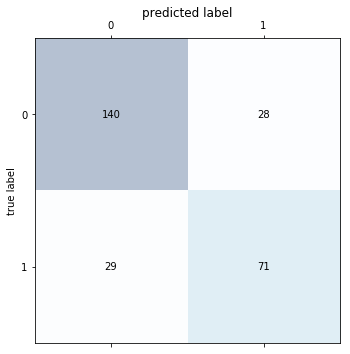

In [25]:
# 混同行列をグラフでプロット
plot_cm(cm_1)

In [26]:
# 正答率を出力
from sklearn import metrics
metrics.accuracy_score(y_1_test, svc_1.predict(X_1_test))

0.78731343283582089